# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy as ow
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import time
import os
# Import API key
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Create a settings object with your API key and preferred units
settings = {"units": "imperial", "appid": api_key}

In [14]:

#using wrapper to request the info, get a sample
ow.get_current(cities[1], **settings)

{'coord': {'lon': 12.2, 'lat': 65.46},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 35.37,
  'feels_like': 19.38,
  'temp_min': 33.01,
  'temp_max': 37.4,
  'pressure': 989,
  'humidity': 86},
 'wind': {'speed': 21.92, 'deg': 200},
 'snow': {'3h': 0.94},
 'clouds': {'all': 100},
 'dt': 1578870368,
 'sys': {'type': 1,
  'id': 1611,
  'country': 'NO',
  'sunrise': 1578906190,
  'sunset': 1578922539},
 'timezone': 3600,
 'id': 3159954,
 'name': 'Bronnoysund',
 'cod': 200}

In [15]:

# Get data for each city in cities.csv
weather_data = []
print(
    'Beginning Data Retrieval',
    '\n',
    '-----------------------------'
)
cities_final =[]
city_count_per_set = 1
city_count_total = 1
for city in cities:
    try:
        weather_data.append(ow.get_current(city, **settings))
        cities_final.append(city)
        if city_count_per_set > 50:
            city_count_per_set = 1
        set_count = (city_count_total // 51) + 1
        print(
            f'Processing Record {city_count_per_set} of Set {set_count} | {city}'
        )
        city_count_per_set += 1
        city_count_total += 1
        #only 60 calls per minute
        time.sleep(1.1)
    except (urllib.error.HTTPError, NameError, KeyError, IndexError):
        print(f'{city} | City not found. Skipping...')
        
print(
    '-----------------------------',
    '\n',
    'Data Retrieval Complete',
    '\n',
    '-----------------------------'
)

Beginning Data Retrieval 
 -----------------------------
Processing Record 1 of Set 1 | nishihara
Processing Record 2 of Set 1 | bronnoysund
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | eidfjord
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | yenagoa
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | ajdabiya
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | cidreira
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | robstown
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | kampot


NameError: name 'urllib' is not defined

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:

# Create an "extracts" object to get the city, cloudiness, country, date, humidity, lat,lng, max temp, wind speed
# and longitude in each city
summary = ["clouds.all","sys.country","dt","main.humidity","coord.lat", "coord.lon","main.temp_max", "wind.speed"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in weather_data]

weather_data_df = pd.DataFrame(data, index=cities_final)
weather_data_df.head()

,0,1,2,3,4,5,6,7
nishihara,100,JP,1578870380,51,26.18,127.76,62.60,10.29
bronnoysund,100,NO,1578870368,86,65.46,12.20,37.40,21.92
jamestown,90,US,1578870353,86,42.10,-79.24,32.00,4.70
luderitz,15,NA,1578870384,83,-26.65,15.16,65.32,28.30
eidfjord,100,NO,1578870385,77,60.47,7.07,26.01,8.99


In [17]:

#reset index and rename columns for weather_data_df
weather_data_df_reset=weather_data_df.reset_index()
weather_data_df_reset.head()

,index,0,1,2,3,4,5,6,7
0,nishihara,100,JP,1578870380,51,26.18,127.76,62.60,10.29
1,bronnoysund,100,NO,1578870368,86,65.46,12.20,37.40,21.92
2,jamestown,90,US,1578870353,86,42.10,-79.24,32.00,4.70
3,luderitz,15,NA,1578870384,83,-26.65,15.16,65.32,28.30
4,eidfjord,100,NO,1578870385,77,60.47,7.07,26.01,8.99


In [18]:
weather_data_df_renamed = weather_data_df_reset.rename(columns = {
    "index": "City",
    0: "Cloudiness",
    1: "Country",
    2: "Date",
    3: "Humidity",
    4: "Lat",
    5: "Lng",
    6: "Max Temp",
    7: "Wind Speed"
})
weather_data_df_renamed.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nishihara,100,JP,1578870380,51,26.18,127.76,62.60,10.29
1,bronnoysund,100,NO,1578870368,86,65.46,12.20,37.40,21.92
2,jamestown,90,US,1578870353,86,42.10,-79.24,32.00,4.70
3,luderitz,15,NA,1578870384,83,-26.65,15.16,65.32,28.30
4,eidfjord,100,NO,1578870385,77,60.47,7.07,26.01,8.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

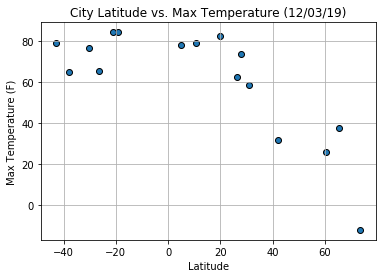

In [19]:

# Build a scatter plot for each data type
plt.scatter(weather_data_df_renamed["Lat"], weather_data_df_renamed["Max Temp"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (12/03/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../CityLatitudeAndMaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

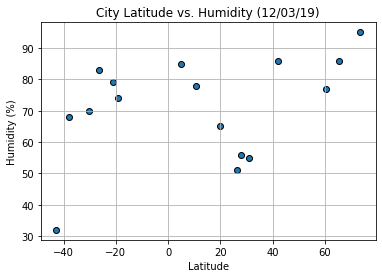

In [20]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df_renamed["Lat"], weather_data_df_renamed["Humidity"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (12/03/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../CityLatitudeAndHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

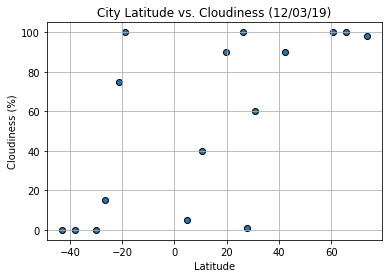

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df_renamed["Lat"], weather_data_df_renamed["Cloudiness"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (12/03/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../CityLatitudeAndCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

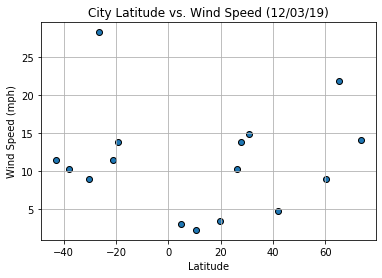

In [22]:

# Build a scatter plot for each data type
plt.scatter(weather_data_df_renamed["Lat"], weather_data_df_renamed["Wind Speed"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (12/03/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../CityLatitudeAndWindSpeed.png")

# Show plot
plt.show()